Step 1: Load the Data and Initial Exploration
✅ Tasks:
Import necessary libraries

Load the dataset

View the first few rows

Check data types and null values

In [ ]:
import chardet
import pandas as pd
import numpy as np

# Detect encoding
with open("data.csv", "rb") as f:
	result = chardet.detect(f.read())
	encoding = result['encoding']

# Step 2: Load the dataset with detected encoding
df = pd.read_csv("data/data.csv", encoding=encoding)

# Step 3: View the first 5 rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:

df.info()

#Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Step 2: Data Cleaning
✅ Tasks:
Remove rows with missing CustomerID

Remove canceled orders (where InvoiceNo starts with 'C')

Remove negative or zero quantities

Convert InvoiceDate to datetime

In [ ]:
#  Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

#  Remove canceled orders
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

#  Remove rows with Quantity <= 0
df = df[df['Quantity'] > 0]

#  Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#  Create a new column 'TotalPrice' = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Check the cleaned data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Step 3: Exploratory Data Analysis (EDA)
We'll analyze trends and patterns in the data to understand sales, customer behavior, and product performance.

✅ Tasks:
Top 10 products by quantity sold

Revenue by country

Monthly sales trends

Sales by hour of day

<Axes: title={'center': 'Top 10 Products by Quantity Sold'}, xlabel='Description'>

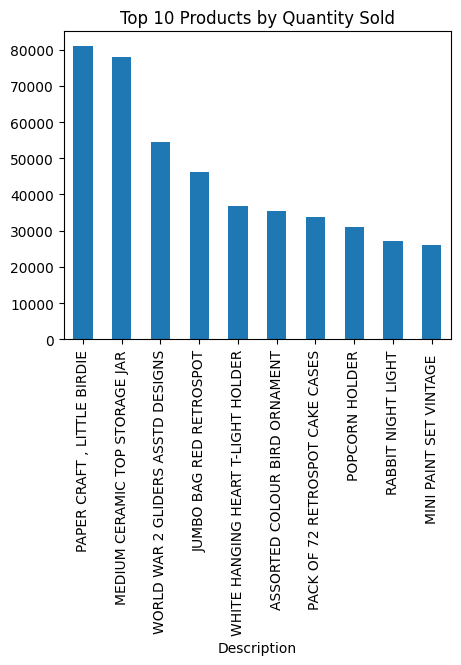

In [20]:
#Top 10 Products by Quantity Sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(5, 4), title='Top 10 Products by Quantity Sold')


<Axes: title={'center': 'Revenue by Country'}, xlabel='Country'>

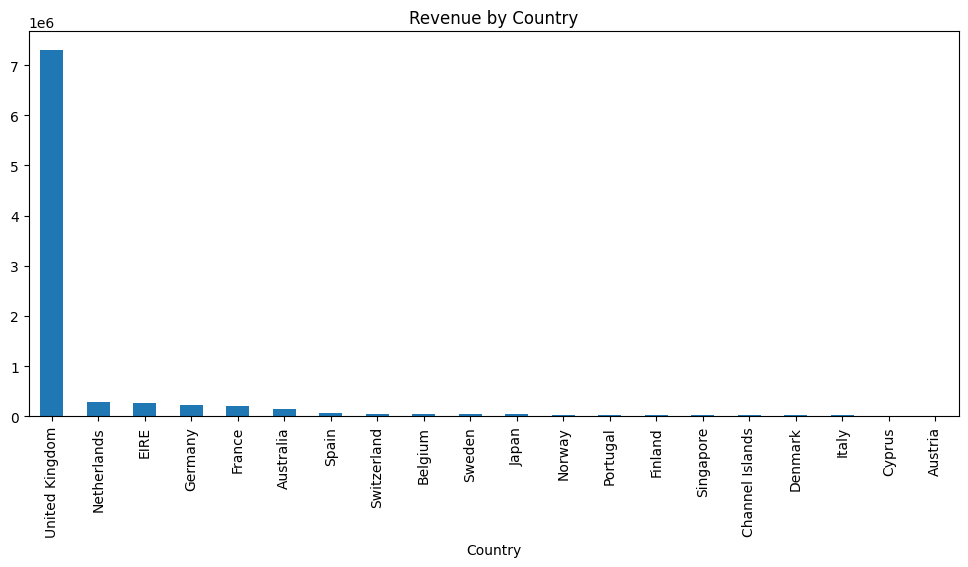

In [11]:
# Revenue by Country
revenue_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
revenue_by_country = revenue_by_country[revenue_by_country > 10000]  # filter small sales

revenue_by_country.plot(kind='bar', figsize=(12, 5), title='Revenue by Country')


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='InvoiceMonth'>

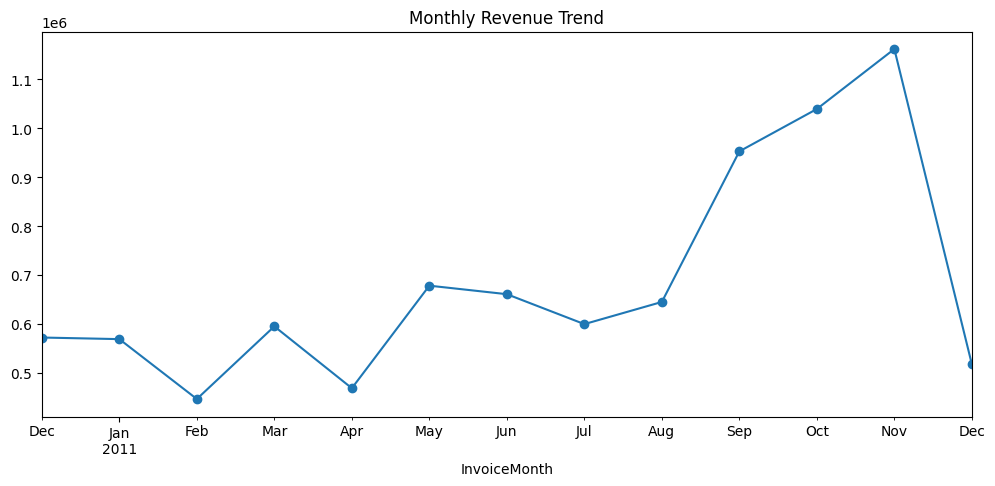

In [12]:
# Monthly Sales Trend
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(12, 5), title='Monthly Revenue Trend')


<Axes: title={'center': 'Sales by Hour of the Day'}, xlabel='Hour'>

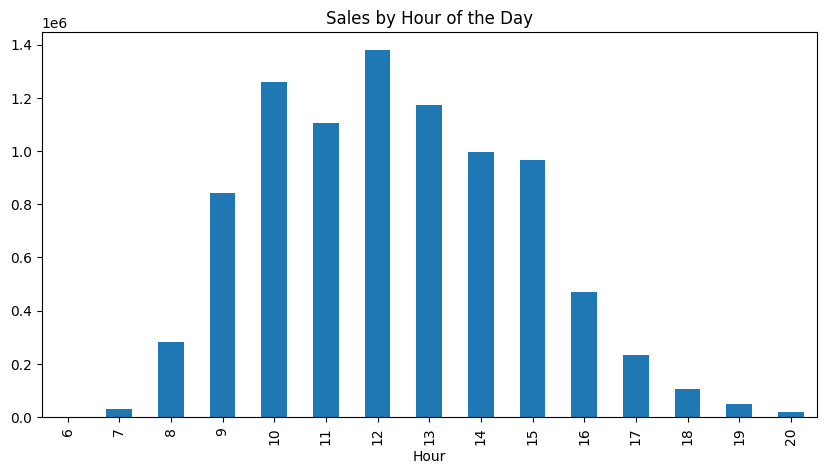

In [13]:
df['Hour'] = df['InvoiceDate'].dt.hour
sales_by_hour = df.groupby('Hour')['TotalPrice'].sum()

sales_by_hour.plot(kind='bar', figsize=(10, 5), title='Sales by Hour of the Day')


 Step 4: RFM Analysis (Recency, Frequency, Monetary)
Goal: Segment customers based on their shopping behavior to find:

💎 Loyal customers

⚠️ At-risk customers

🌱 New customers



RFM Metrics Definitions:
Recency: Days since last purchase

Frequency: Number of purchases

Monetary: Total amount spent



Steps:
Use the latest invoice date in the data to calculate "Recency"

Group by CustomerID to get RFM values

Assign scores to R, F, M

Segment customers

In [14]:
# Use the day after the last transaction as the reference
import datetime

latest_date = df['InvoiceDate'].max() + datetime.timedelta(days=1)
print(f"Reference Date: {latest_date}")




Reference Date: 2011-12-10 12:50:00


In [15]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'TotalPrice': 'sum'                                      # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# View sample
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [16]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Create a combined RFM score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,7,4310.00,4,4,4,444,12
12348.0,75,4,1797.24,2,3,4,234,9
12349.0,19,1,1757.55,3,1,4,314,8
12350.0,310,1,334.40,1,1,2,112,4


<Axes: title={'center': 'Customer Segments'}, xlabel='Customer_Type'>

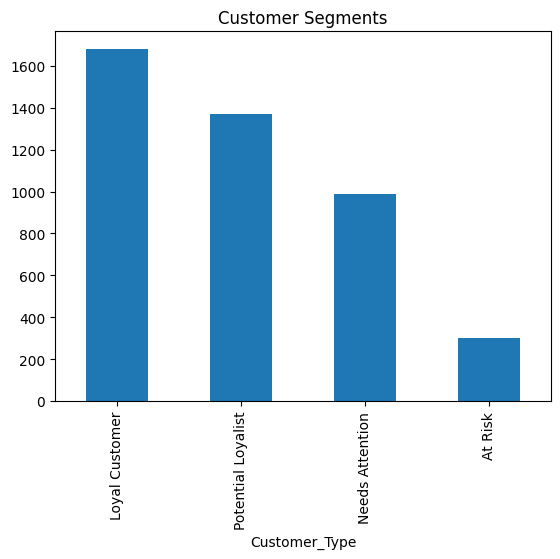

In [17]:
def segment(score):
    if score >= 9:
        return 'Loyal Customer'
    elif score >= 6:
        return 'Potential Loyalist'
    elif score >= 4:
        return 'Needs Attention'
    else:
        return 'At Risk'

rfm['Customer_Type'] = rfm['RFM_Score'].apply(segment)

rfm['Customer_Type'].value_counts().plot(kind='bar', title='Customer Segments')


In [18]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.1 MB 512.6 kB/s eta 0:00:19
   -- ------------------------------------- 0.5/10.1 MB 512.6 kB/s eta 0:00:19
   -- ------------------------------------- 0.5/10.1 MB 512.6 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/10.1 MB 552.8 kB/s eta 0:00:17
   --- ------------------------------------ 0.8/10.1 MB 552.8 kB/s eta 0:00:17
   ---- ----------------------------------- 1.


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: C:\Users\harshal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
